# Covid-19 Assignment

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Dataset from using read_html

In [235]:
raw = pd.read_html("https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml#",header=1)


## Save it to csv file

In [236]:
raw[0].to_csv("Covid.csv")


## Read CSV file

In [287]:
df = pd.read_csv("Covid.csv")


In [288]:
df.head()

,Unnamed: 0,1,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,...,Source_2,Source_3,Backup Notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,1.0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.0,2.0,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,3.0,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.0,4.0,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extract Gender, State and Age Column from dataset

In [289]:
sub_df = df[["Gender","Detected State","Age Bracket"]]

In [290]:
sub_df.head()

,Gender,Detected State,Age Bracket
0,NaN,NaN,NaN
1,F,Kerala,20
2,NaN,Kerala,NaN
3,NaN,Kerala,NaN
4,M,Delhi,45


In [291]:
sub_df.shape

(2072, 3)

## Here your can see Age is object type

In [292]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 3 columns):
Gender            742 non-null object
Detected State    1723 non-null object
Age Bracket       618 non-null object
dtypes: object(3)
memory usage: 48.7+ KB


## Drop NA Values

In [293]:
sub_df.dropna(subset = ['Detected State','Gender'],inplace=True)

In [294]:
#sub_df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "M" else 0)

In [295]:
sub_df.head()

,Gender,Detected State,Age Bracket
1,F,Kerala,20
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
21,F,Rajasthan,70


In [296]:
sub_df["Age Bracket"].fillna('0',inplace=True)

In [297]:
def assign_age(x):
    if len(x)>3:
        x1,x2 = x.split('-')
        return str((int(x1)+int(x2))/2).split('.')[0]
    else:
        return x



In [298]:
sub_df['Age Bracket']  = sub_df["Age Bracket"].apply(assign_age)

## change Age column to int type and replace NA values in Age column with mean 

In [299]:
sub_df["Age Bracket"] = sub_df['Age Bracket'].astype(int)

In [300]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 1 to 1663
Data columns (total 3 columns):
Gender            742 non-null object
Detected State    742 non-null object
Age Bracket       742 non-null int64
dtypes: int64(1), object(2)
memory usage: 23.2+ KB


In [301]:
age_mean = int(sub_df[sub_df["Age Bracket"]!=0]['Age Bracket'].mean())

In [310]:
sub_df["Age Bracket"].replace(0,age_mean,inplace=True)

In [311]:
sub_df.head()

,Gender,Detected State,Age Bracket
1,F,Kerala,20
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
21,F,Rajasthan,70


Text(0.5, 1.0, 'Average Age of affected Males/Females in all states in india')

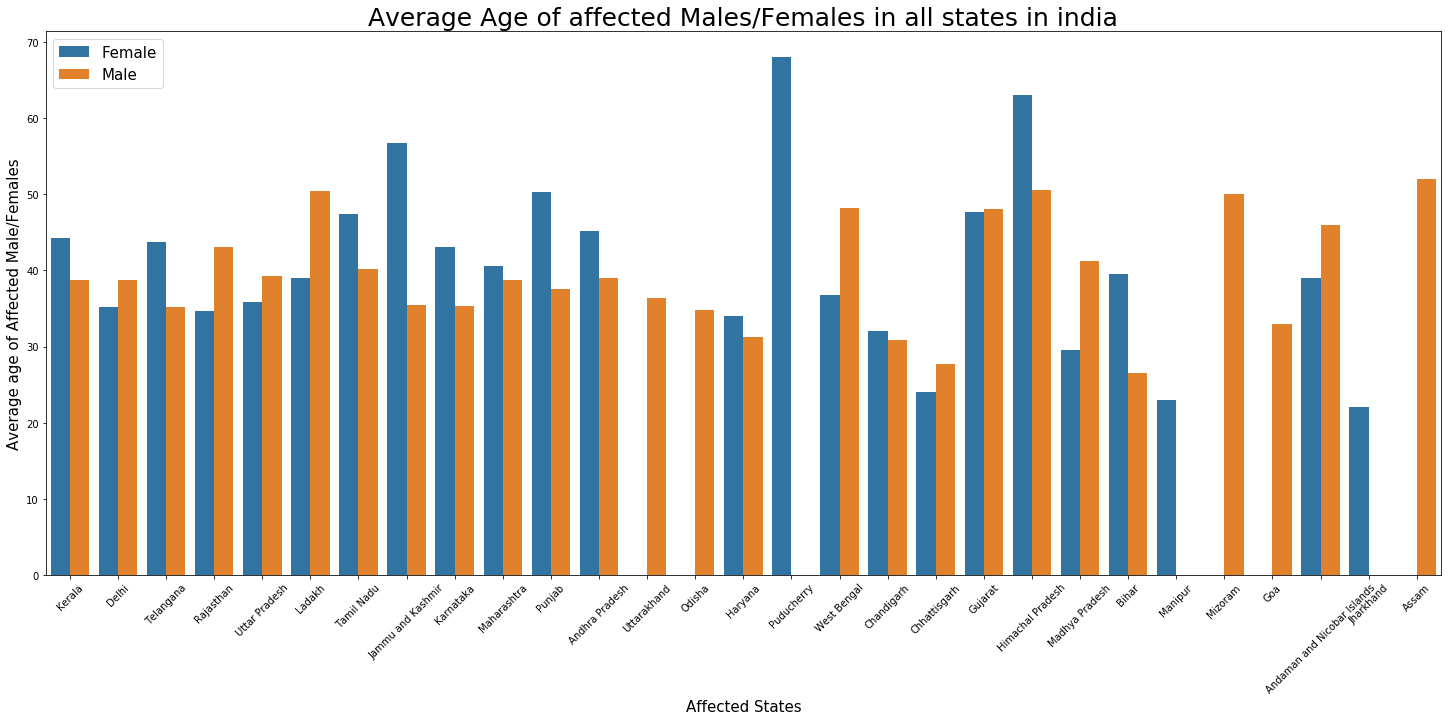

In [312]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
sns.barplot(x="Detected State",y = 'Age Bracket',data=sub_df,hue='Gender',ci=None)
plt.legend(["Female","Male"],prop={'size': 15})
plt.xlabel("Affected States",fontdict={"size":15})
plt.ylabel("Average age of Affected Male/Females",fontdict={"size":15})
plt.title("Average Age of affected Males/Females in all states in india",fontdict={"size":25})